In [1]:
# For data handling and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression example

https://scikit-learn.org/stable/datasets/index.html#diabetes-dataset

In [2]:
# Load the dataset
from sklearn import datasets
diabetes = datasets.load_diabetes()

In [3]:
# Get input, output, and their names
X = diabetes.data
y = diabetes.target
names = diabetes.feature_names

In [4]:
# First 5 data points
df = pd.DataFrame(np.concatenate((X, y[:, np.newaxis]), axis=1), columns=names + ['disease progression'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,disease progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
# Only one feature
bmi = X[:, np.newaxis, 2]

Text(0, 0.5, 'disease progression')

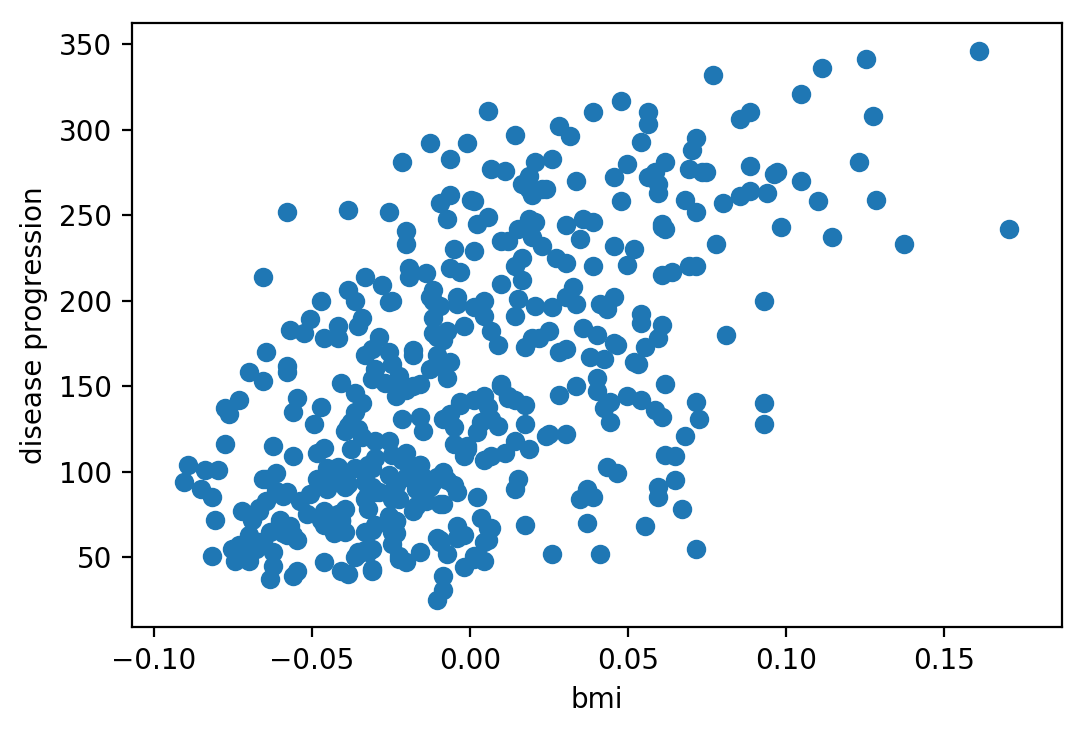

In [6]:
# Plot bmi vs. target variable
plt.figure(dpi=200)
plt.scatter(bmi, y)
plt.xlabel('bmi')
plt.ylabel('disease progression')

In [7]:
# Split the dataset into train and test

X_train = bmi[:300]
y_train = y[:300]

X_test = bmi[300:]
y_test = y[300:]

In [8]:
# Sanity check the shapes
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((300, 1), (300,), (142, 1), (142,))

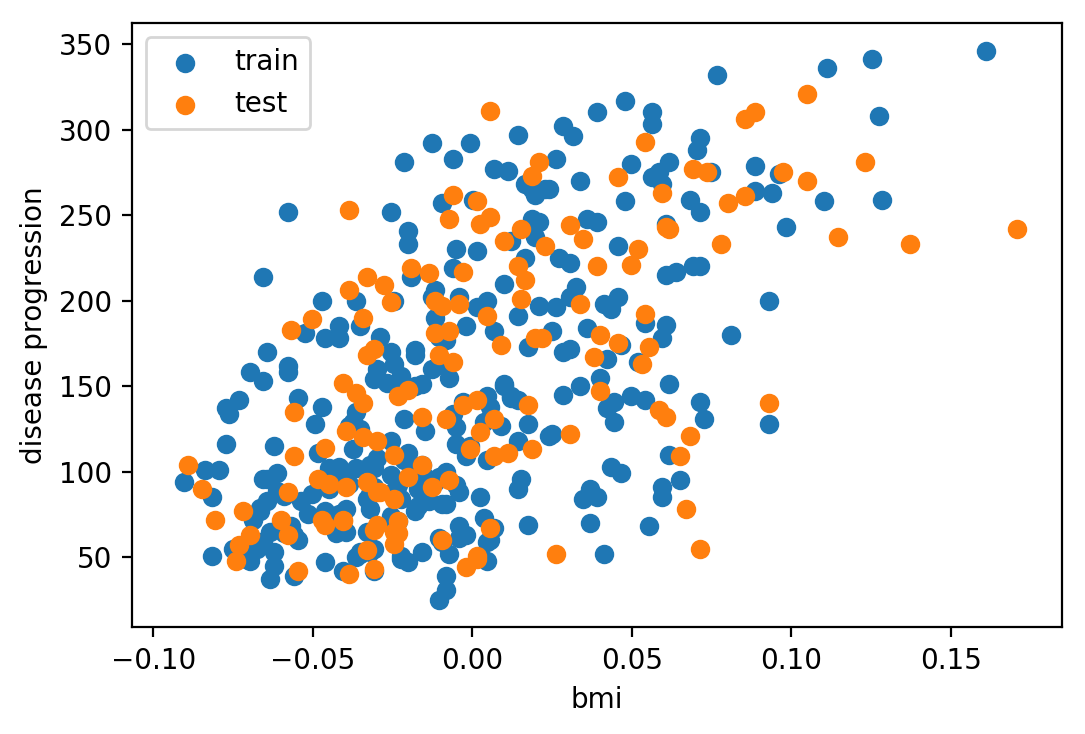

In [9]:
# Plot train and test
plt.figure(dpi=200)
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.legend()

In [10]:
# Call the linear regression object
from sklearn import linear_model
model1 = linear_model.LinearRegression()

In [11]:
# LEARN = .fit(input, target)
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [12]:
# Get predictions for the test set
preds = model1.predict(X_test)

In [13]:
# Check predictions vs. labels for the first 10 data points
preds[:10], y_test[:10]

(array([222.78610979, 127.10097299, 183.88116406, 184.93264908,
        113.43166773, 112.38018271, 149.1821584 , 120.79206287,
        106.07127259, 152.33661346]),
 array([275.,  65., 198., 236., 253., 124.,  44., 172., 114., 142.]))

In [14]:
# Quantify the error
preds[:10] - y_test[:10]

array([ -52.21389021,   62.10097299,  -14.11883594,  -51.06735092,
       -139.56833227,  -11.61981729,  105.1821584 ,  -51.20793713,
         -7.92872741,   10.33661346])

In [15]:
# Use absolute values to avoid positive/negative errors canceling each other
abs(preds[:10] - y_test[:10])

array([ 52.21389021,  62.10097299,  14.11883594,  51.06735092,
       139.56833227,  11.61981729, 105.1821584 ,  51.20793713,
         7.92872741,  10.33661346])

In [16]:
# Find the mean abs error
np.mean(abs(preds[:10] - y_test[:10]))

50.53446360349993

In [17]:
# Find the mean abs error, for all test data
np.mean(abs(preds - y_test))

50.59683538302396

In [18]:
# This and many other metrics are available in sklearn
from sklearn import metrics
metrics.mean_absolute_error(y_test, preds)

50.59683538302396

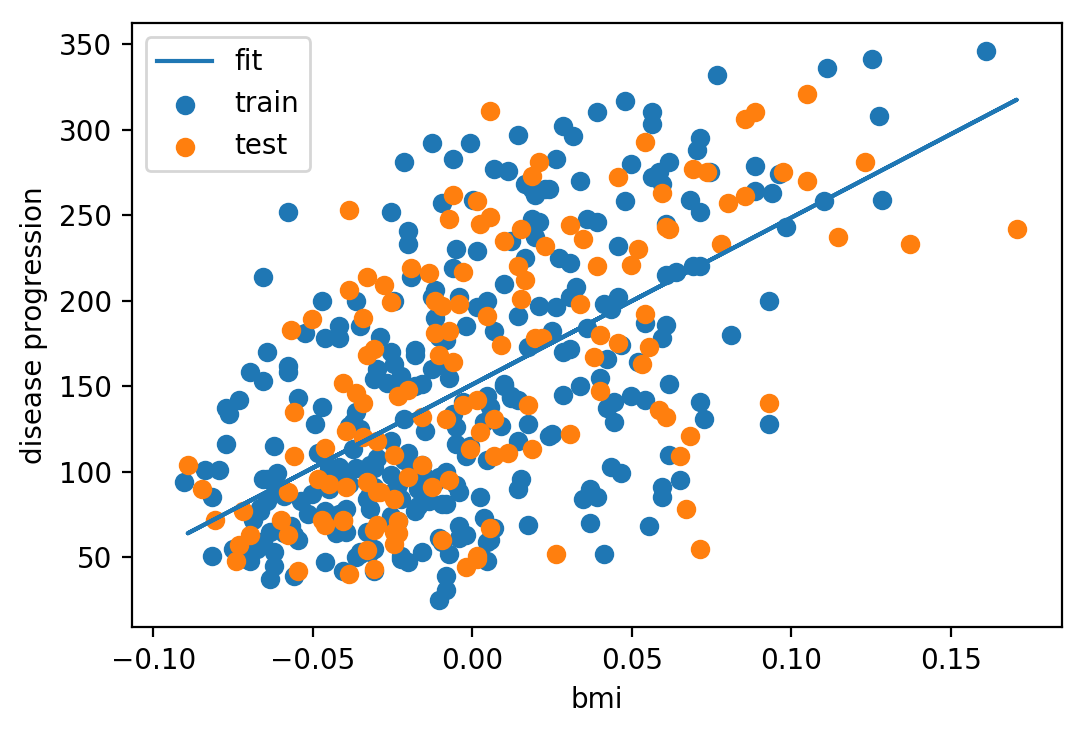

In [19]:
# Plot train/test data with fit
plt.figure(dpi=200)
plt.scatter(X_train, y_train, label='train')
plt.plot(X_test, model1.predict(X_test), label='fit')
plt.scatter(X_test, y_test, label='test')
plt.xlabel('bmi')
plt.ylabel('disease progression')
plt.legend()

# Deep learning example

In [20]:
# Download the MNIST ataset
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


Label:  3


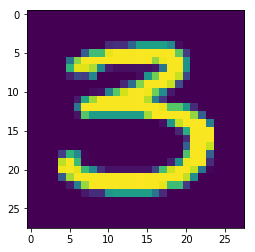

In [21]:
# Random digit from the training set.
index = np.random.randint(0, 60000)
plt.imshow(x_train[index])
print('Label: ', y_train[index])

In [22]:
# Build the architecture
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Activation, Dense

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
model2.add(Activation('relu'))
model2.add(Conv2D(32, (3, 3), strides=2, padding='same'))
model2.add(Activation('relu'))
model2.add(Flatten())
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                62730     
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total para

In [23]:
# Set the optimizer and the loss
from keras.optimizers import Adam, SGD
opt = SGD(lr=0.001)
model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
# Put data into suitable shape
from keras.utils import to_categorical
y_test = to_categorical(y_test)
y_train = to_categorical(y_train)

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [25]:
# Train and test
H = model2.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 53s 889us/step - loss: 0.1489 - acc: 0.9710 - val_loss: 0.0460 - val_acc: 0.9859


Label: 8
Prediction:  3


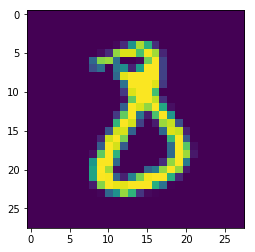

In [26]:
# Random image from the test set
index = np.random.randint(0, 10000)
random_image = x_test[np.newaxis, index]
plt.imshow(random_image.reshape(28, 28))
print('Label:', np.argmax(y_test[index]))
print('Prediction: ', np.argmax(model2.predict(random_image)))  # model.predict(image)

# Challenge 1

In [27]:
from sklearn import datasets
diabetes = datasets.load_diabetes()

- Repeat the example: predict disease progression from bmi

- Check errors with different metrics e.g. mean squared error (mse)
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Compare mse with mae

- Find the intercept and slope using sklearn.linear_model.LinearRegression attributes
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

- Instead of bmi only, use more features and fit again, check if the performance improves

- Use other algorithms e.g. Random Forests

# Data = Signal + Noise

- Data generation
    - Signal
    - Noise
    - Signal + Noise

In [28]:
# Newton's second law as signal

m = 2  # kg
F = 10  # N

a = F/m  # m/s2

# a = intercept + slope * F

a

5.0

In [29]:
# 10 random F's between 0 and 1
F = np.random.rand(10, 1)
F

array([[0.27265566],
       [0.45639664],
       [0.59645395],
       [0.93229163],
       [0.42039381],
       [0.79091579],
       [0.92921021],
       [0.89619034],
       [0.93065236],
       [0.95336649]])

In [30]:
# 10 random F's between 0 and 100
F = np.random.rand(10, 1)*100
F

array([[17.48382141],
       [76.99769087],
       [ 9.11378162],
       [89.1453672 ],
       [69.00352034],
       [18.27328023],
       [93.63434462],
       [41.13464976],
       [56.54294344],
       [20.48335529]])

In [31]:
# Calculate a using Newton's second law
a = F/m
a

array([[ 8.7419107 ],
       [38.49884543],
       [ 4.55689081],
       [44.5726836 ],
       [34.50176017],
       [ 9.13664012],
       [46.81717231],
       [20.56732488],
       [28.27147172],
       [10.24167764]])

Text(0, 0.5, 'a (m/s2)')

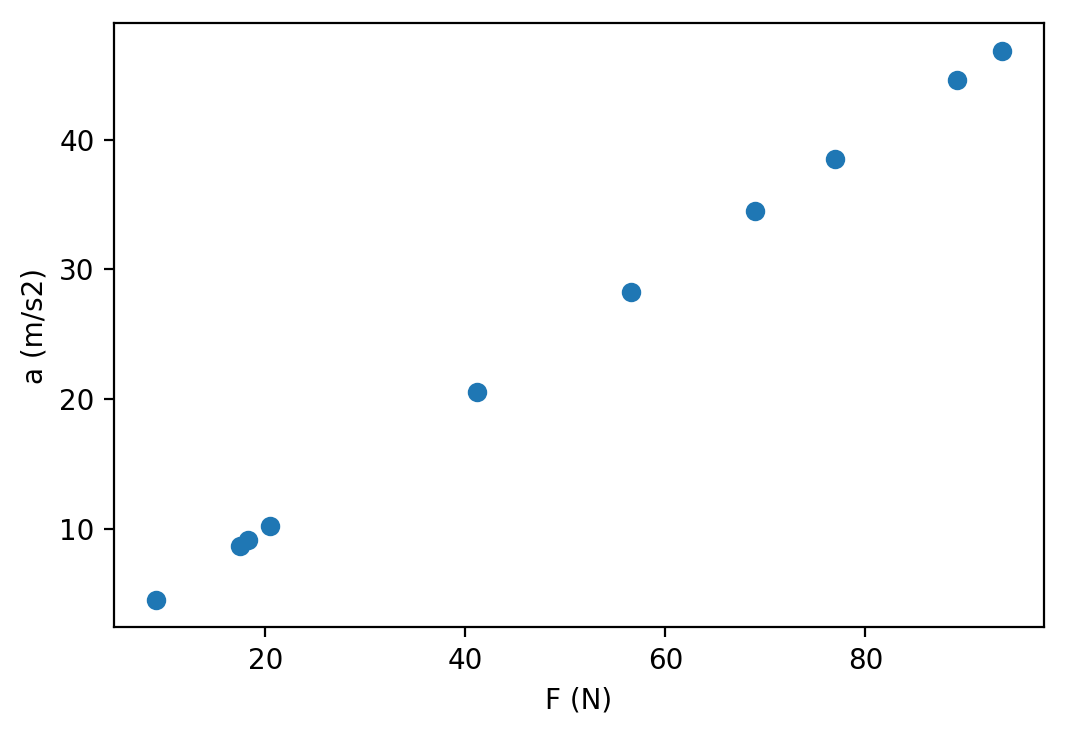

In [32]:
# Plot F vs. a
plt.figure(dpi=200)
plt.scatter(F, a)
plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')

Text(0, 0.5, 'a (m/s2)')

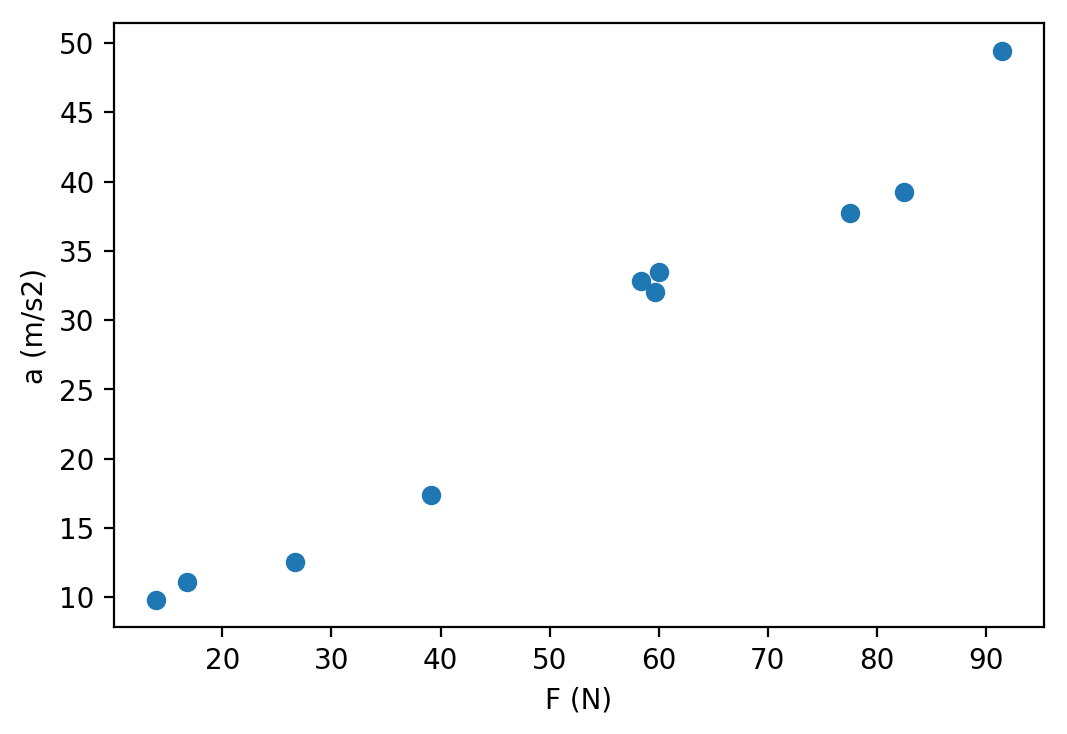

In [33]:
# Let's add noise to the signal
m = 2  # kg
F = np.random.rand(10, 1) * 100  # N
noise = np.random.rand(10, 1) * 10 - 5
a = F/m + noise  # m/s2

# Plot F vs. a
plt.figure(dpi=200)
plt.scatter(F, a)
plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')

**Data = Signal + Noise**

a = F/m + noise

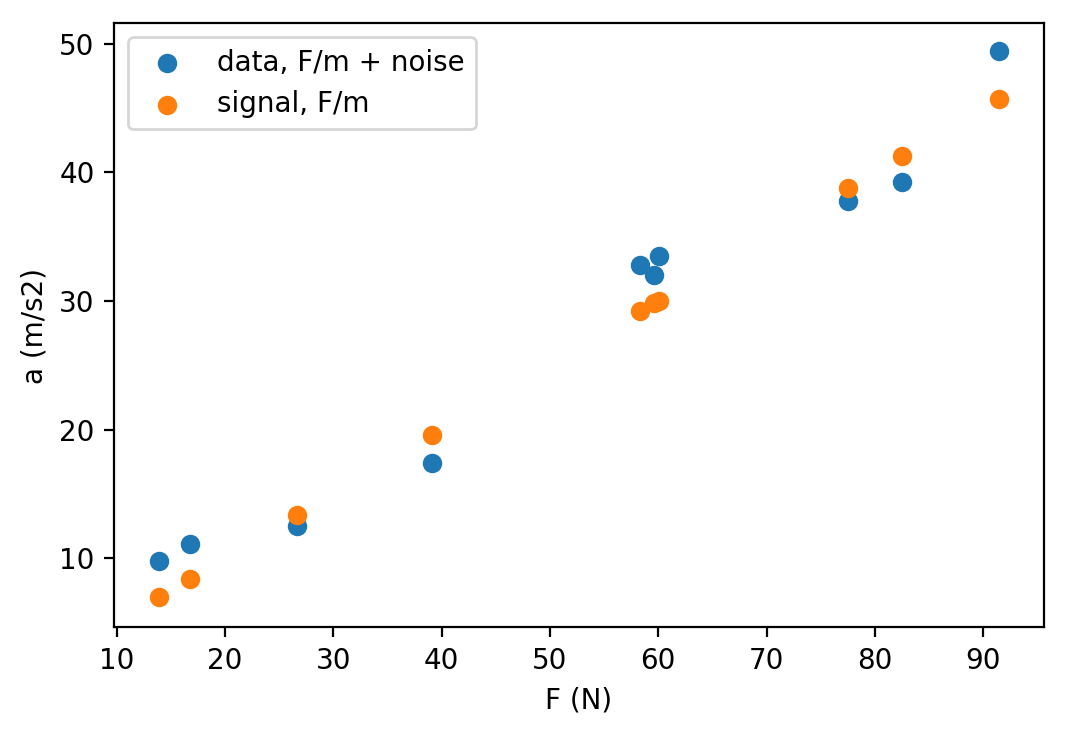

In [34]:
# Signal vs. Data
plt.figure(dpi=200)
plt.scatter(F, a, label='data, F/m + noise')
plt.scatter(F, F/m, label='signal, F/m')
plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

Text(0.5, 1.0, 'Data = Signal + Noise')

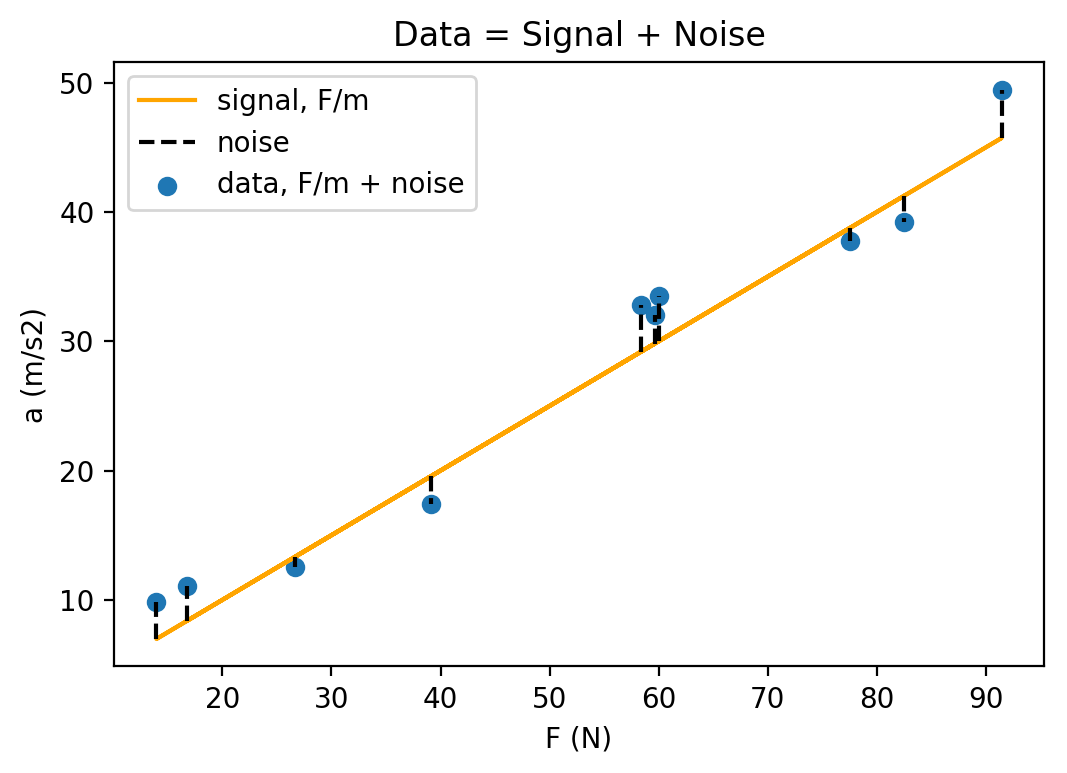

In [35]:
# Data = Signal + Noise
plt.figure(dpi=200)
plt.scatter(F, a, label='data, F/m + noise')
plt.plot(F, F/m, label='signal, F/m', color='orange')

for i in range(len(F)):
    plt.plot([F[i], F[i]], [F[i]/m, a[i]], 'k--', label='noise' if i == 0 else None)

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()
plt.title('Data = Signal + Noise')

**The aim of machine learning is to find the signal**

In [36]:
# We know the signal, let's see if ML can find it
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(F, a)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

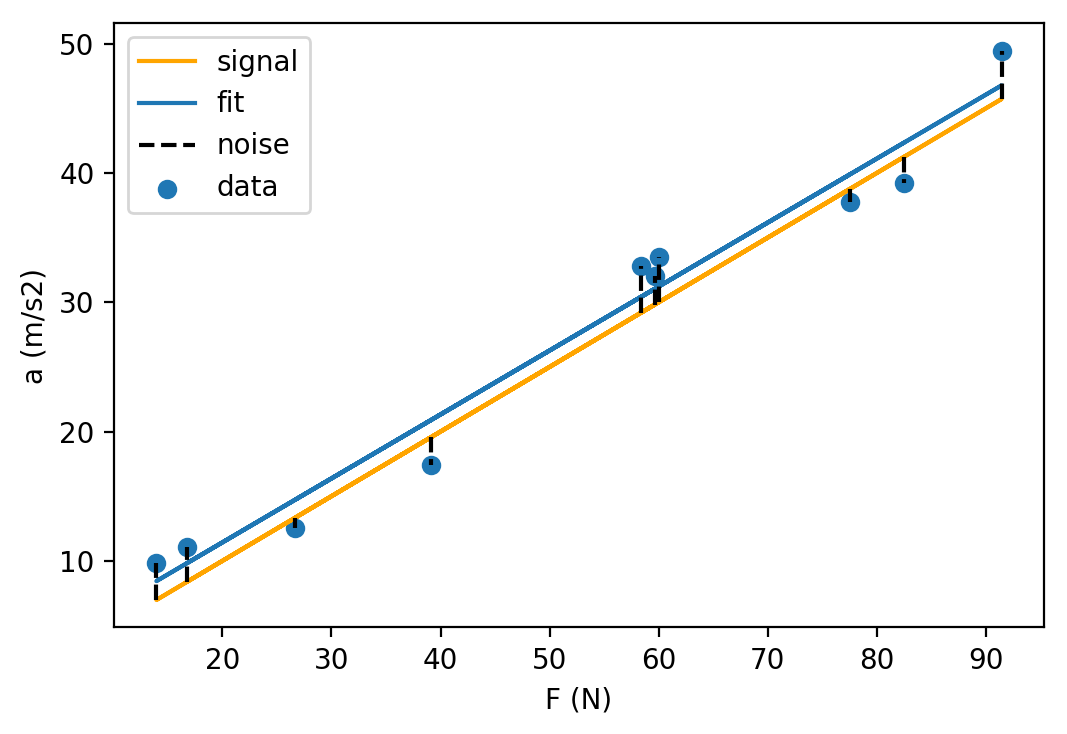

In [37]:
# Signal vs. Fit
plt.figure(dpi=200)
plt.scatter(F, a, label='data')
plt.plot(F, F/m, label='signal', color='orange')
plt.plot(F, linear_model.predict(F), label='fit')

for i in range(len(F)):
    plt.plot([F[i], F[i]], [F[i]/m, a[i]], 'k--', label='noise' if i == 0 else None)

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

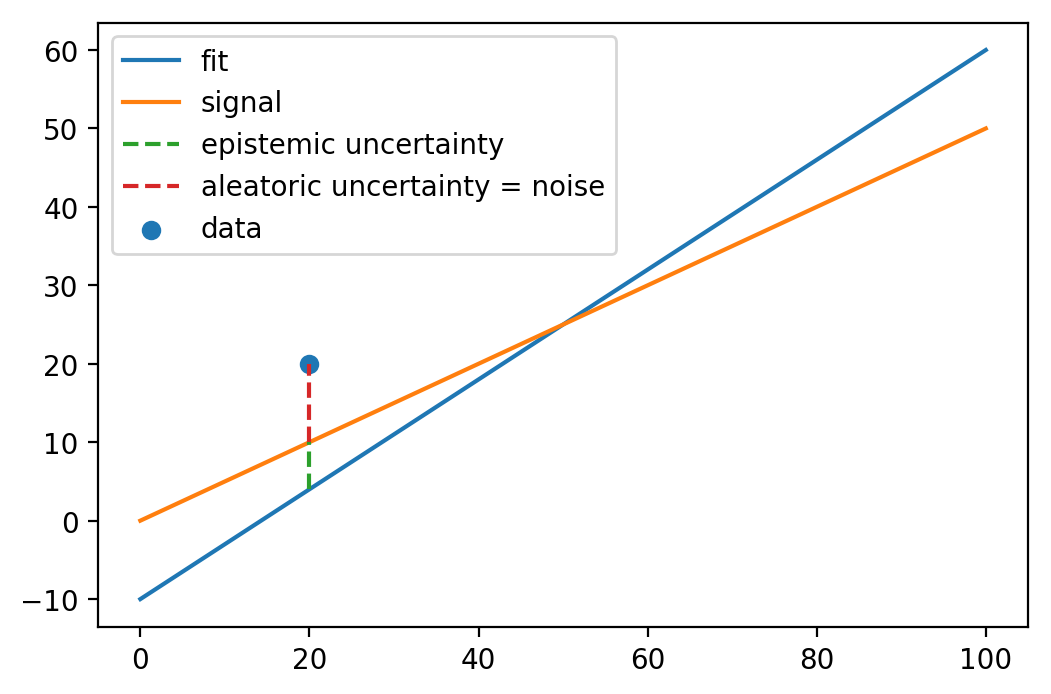

In [38]:
# Aleatoric vs. Epistemic uncertainty
plt.figure(dpi=200)
plt.plot([0, 100], [-10, 60], label='fit')
plt.plot([0, 100], [0, 50], label='signal')
plt.scatter([20], [20], label='data')
plt.plot([20, 20], [4, 10], '--', label='epistemic uncertainty')
plt.plot([20, 20], [10, 20], '--', label='aleatoric uncertainty = noise')
plt.legend()

# Challenge 2

- Plot how epistemic and aleatoric uncertainity will change wrt the number of data. (fixed noise)
- Plot how epistemic and aleatoric uncertainity will change wrt the noise. (fixed number of data)
- Make an educated guess before plotting.

# Overfitting

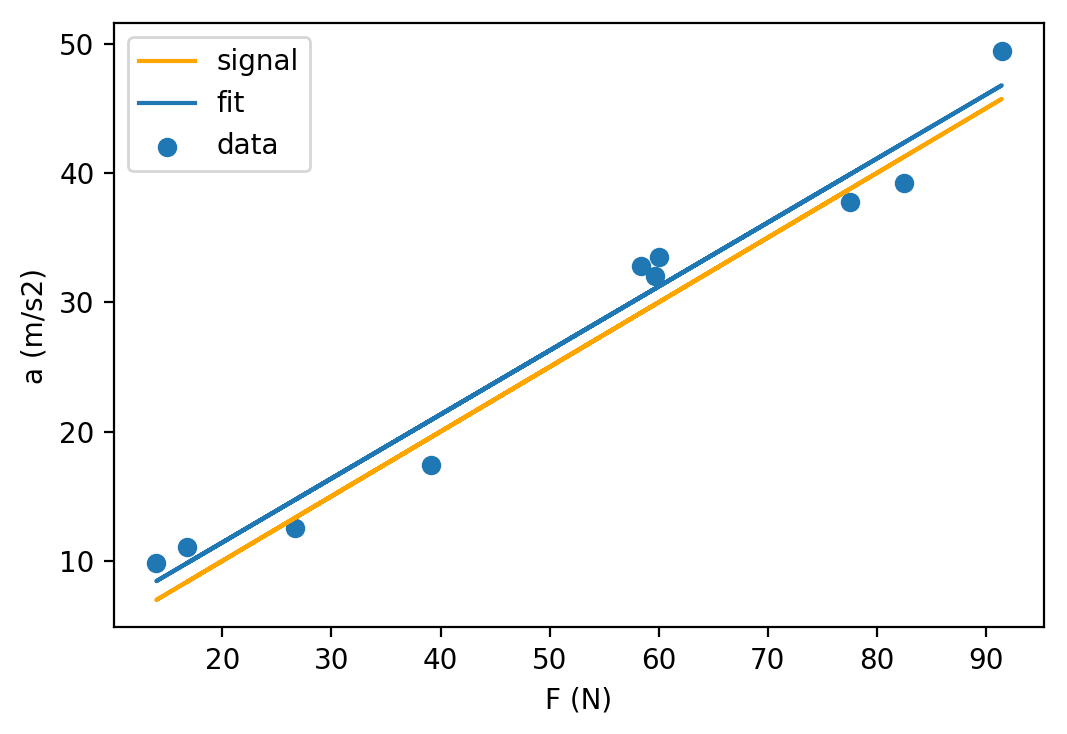

In [39]:
# Plot again the prev. data
plt.figure(dpi=200)
plt.scatter(F, a, label='data')
plt.plot(F, F/m, label='signal', color='orange')
plt.plot(F, linear_model.predict(F), label='fit')

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

In [40]:
# Fit a degree 5 polynomial to F and a
z = np.poly1d(np.polyfit(F.reshape(-1), a.reshape(-1), 5))

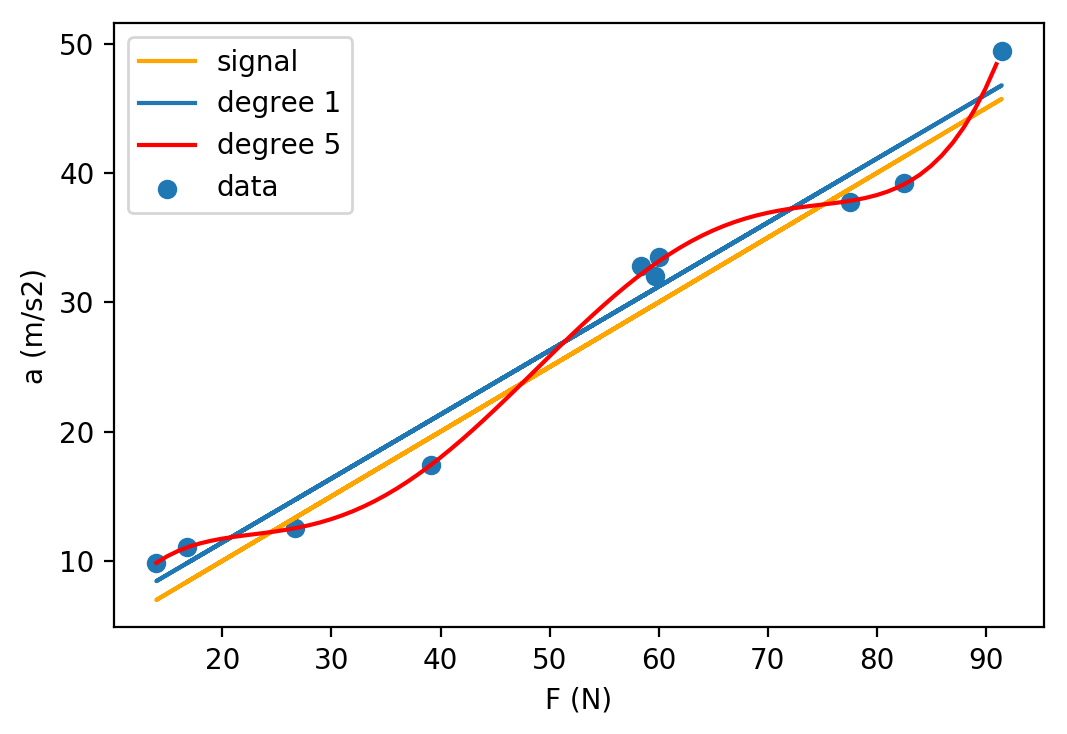

In [41]:
# Plot both fits
plt.figure(dpi=200)
plt.scatter(F, a, label='data')
plt.plot(F, F/m, label='signal', color='orange')
plt.plot(F, linear_model.predict(F), label='degree 1')

plt.plot(np.arange(min(F), max(F)), z(np.arange(min(F), max(F))), label='degree 5', color='red')

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

In [42]:
# Generate new data
m = 2  # kg
F_new = np.random.rand(10, 1) * (max(F)-min(F)) + min(F)  # N
noise = np.random.rand(10, 1) * 10 - 5
a_new = F_new/m + noise  # m/s2

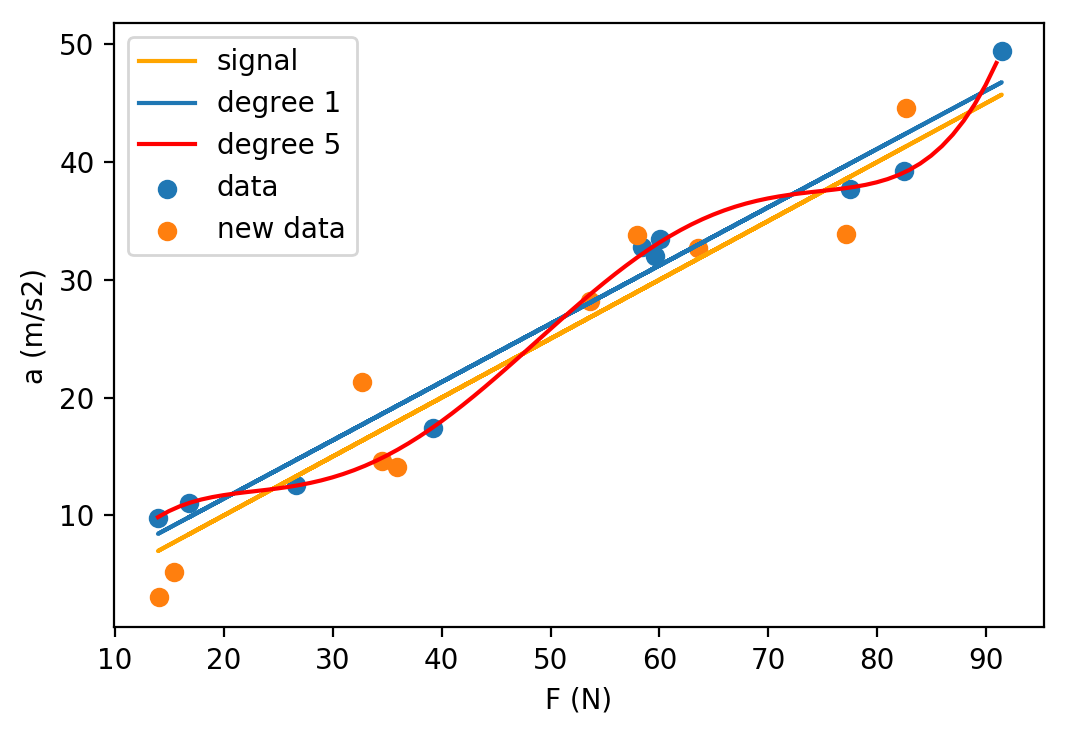

In [43]:
# Both fits on train and test data
plt.figure(dpi=200)
plt.scatter(F, a, label='data')
plt.scatter(F_new, a_new, label='new data')
plt.plot(F, F/m, label='signal', color='orange')
plt.plot(F, linear_model.predict(F), label='degree 1')

plt.plot(np.arange(min(F), max(F)), z(np.arange(min(F), max(F))), label='degree 5', color='red')

plt.xlabel('F (N)')
plt.ylabel('a (m/s2)')
plt.legend()

# Challenge 3

- Calculate training error for both fits
- Calculate test error for both fits
- Fit different degree polynomials and plot training and test errors wrt degree of the polynomial fit
- Generate data using a quartic signal, repeat previous step, and discover yourself what "underfitting" is.

# Challenge 4 

Implement linear regression using gradient descent

In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# Generate data
# 1. Define m and n
m = 10  # number of examples
n = 1  # number of features

In [46]:
# 2. Generate X
X = np.random.uniform(size=(m, n))
X

array([[0.64985039],
       [0.62500976],
       [0.69915575],
       [0.33744647],
       [0.31746079],
       [0.50201737],
       [0.77397666],
       [0.22890078],
       [0.193001  ],
       [0.29300021]])

In [47]:
# 3. Add 1's to X for the bias term for the dot product
X = np.concatenate((np.ones((m, 1)), X), axis=1)
X

array([[1.        , 0.64985039],
       [1.        , 0.62500976],
       [1.        , 0.69915575],
       [1.        , 0.33744647],
       [1.        , 0.31746079],
       [1.        , 0.50201737],
       [1.        , 0.77397666],
       [1.        , 0.22890078],
       [1.        , 0.193001  ],
       [1.        , 0.29300021]])

In [48]:
# 4. Randomly generate parameters
theta_true = np.random.uniform(size=(n+1, 1))
theta_true

array([[0.04970101],
       [0.55483883]])

In [49]:
# 5. Calculate y
y = np.dot(X, theta_true)
y

array([[0.41026324],
       [0.39648069],
       [0.43761977],
       [0.23692942],
       [0.22584059],
       [0.32823974],
       [0.47913332],
       [0.17670406],
       [0.15678546],
       [0.21226891]])

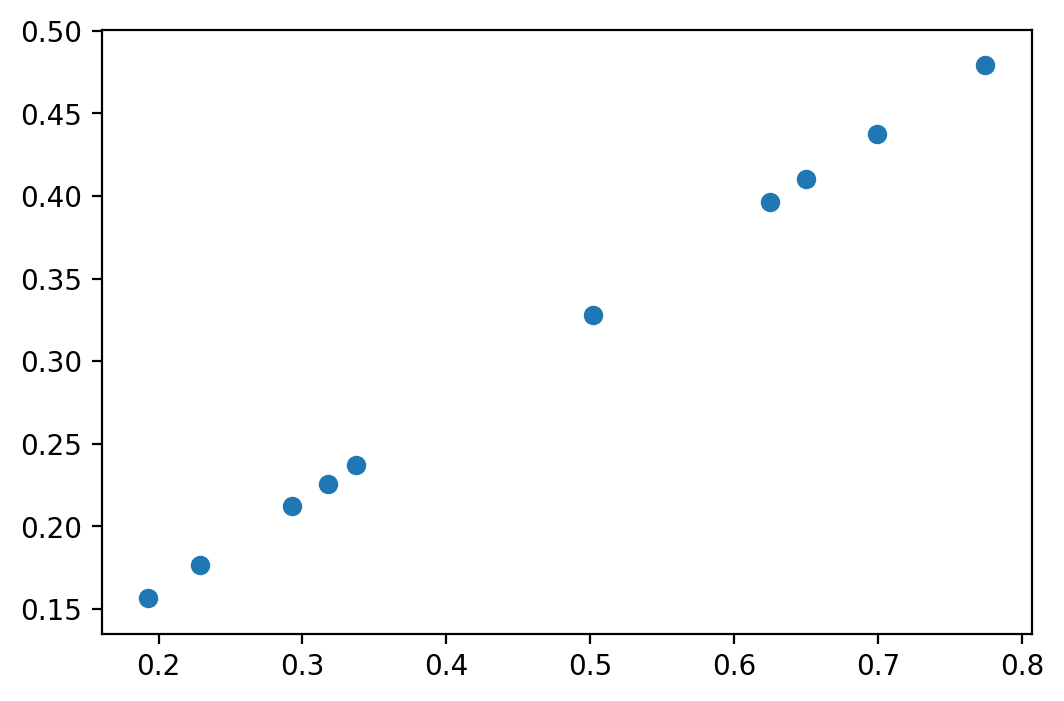

In [50]:
# 6. Plot the generated X and y
plt.figure(dpi=200)
plt.scatter(X[:, 1], y)

In [51]:
def plotter(X, y, theta):
    '''
    Arguments:
        n = 1
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        theta: np array with shape (1+n, 1)
    Returns:
        None
        Plots X, y and the fit defined by theta
    '''
    plt.figure(dpi=200)
    plt.scatter(X[:, 1], y)
    linex = np.linspace(X[:, 1].min(), X[:, 1].max())
    liney = theta[0] + theta[1]*linex
    plt.plot(linex, liney)

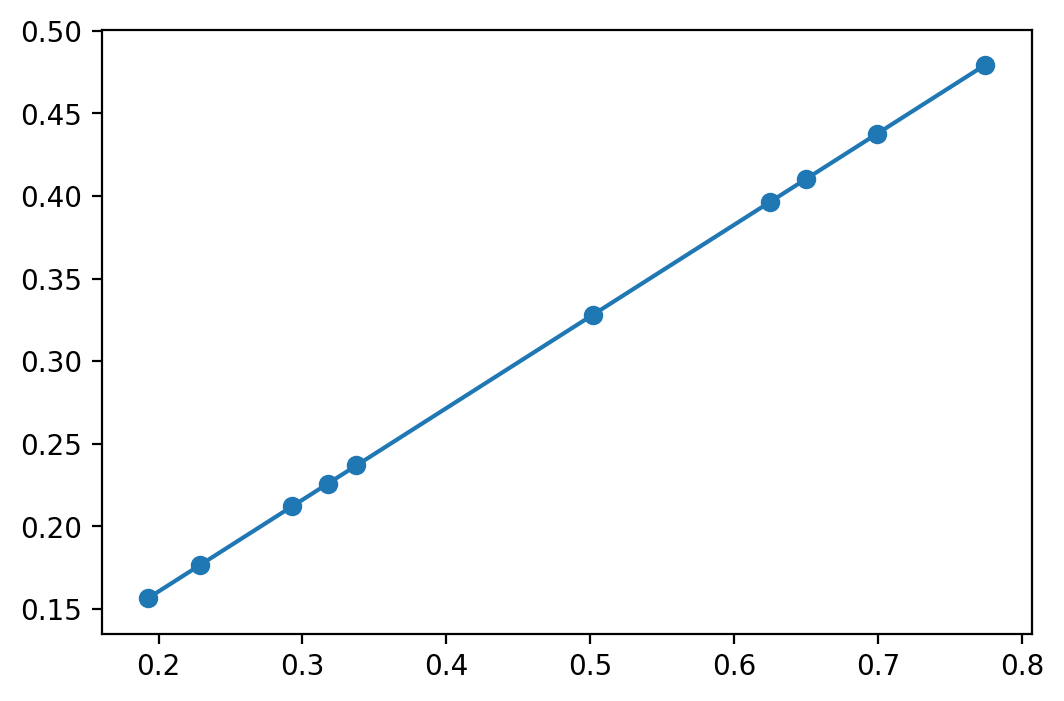

In [52]:
# 7. Plot the generated X and y, together with the signal used to generate them
plotter(X, y, theta_true)

## Gradient Descent

In [53]:
# Random weight initialization
theta = np.random.uniform(size=(n+1, 1))
theta

array([[0.29412786],
       [0.70486621]])

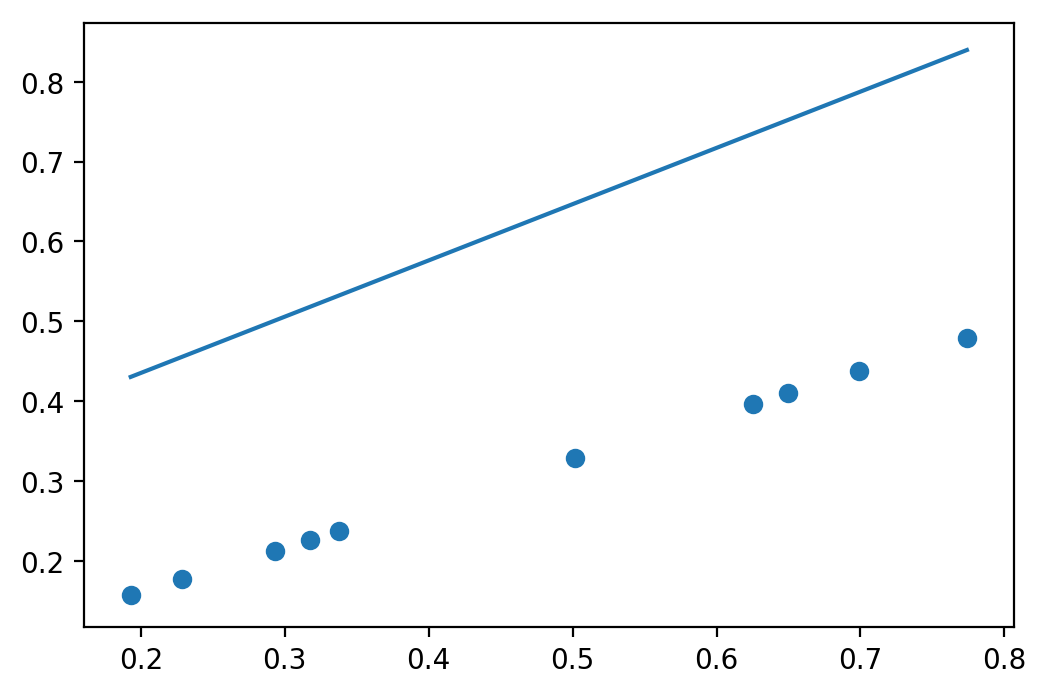

In [54]:
# X, y together with random fit
plotter(X, y, theta)

In [55]:
# Sub-challenge 1
def cost_function(X, y, theta):
    '''
    Arguments:
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        theta: np array with shape (1+n, 1)
    Returns:
        cost, a float.
    '''
    
    return cost

In [56]:
# It should be a positive number
cost_function(X, y, theta)

4.9675336216256785

In [57]:
# It should be zero
cost_function(X, y, theta_true)

0.0

In [58]:
# Sub-challenge 2
# Take the theta, update it using the GD rule
def GD_one_step(X, y, theta, lr):
    '''
    Updates theta using one gradient descent step.
    Arguments:
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        theta: np array with shape (1+n, 1)
        lr: learning rate, a float
    Returns:
        theta_new: np array with shape (1+n, 1), updated after one GD step
    '''
    
    return theta_new

In [59]:
print('theta: ', theta.T)  # Theta before update
print('theta_true: ', theta_true.T)  # True theta

theta:  [[0.29412786 0.70486621]]
theta_true:  [[0.04970101 0.55483883]]


In [60]:
theta = GD_one_step(X, y, theta, lr=0.01)

In [61]:
print('theta: ', theta.T) # Theta after the first update
print('theta_true: ', theta_true.T)  # True theta

theta:  [[0.2909905  0.70335549]]
theta_true:  [[0.04970101 0.55483883]]


In [62]:
# Sub-challenge 3
# Repeat update
def GD(X, y, lr, epoch):
    '''
    Finds theta from X and y using gradient descent.
    Starts by random init. of theta
    Repeats GD_one_step for predefined number of epochs
    Arguments:
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        lr: learning rate, a float
        epoch: an integer
    Returns:
        theta: np array with shape (1+n, 1), final theta after training
    '''
    
    return theta

In [63]:
# Linear regression with Gradient Descent
theta = GD(X, y, lr=0.01, epoch=10000)

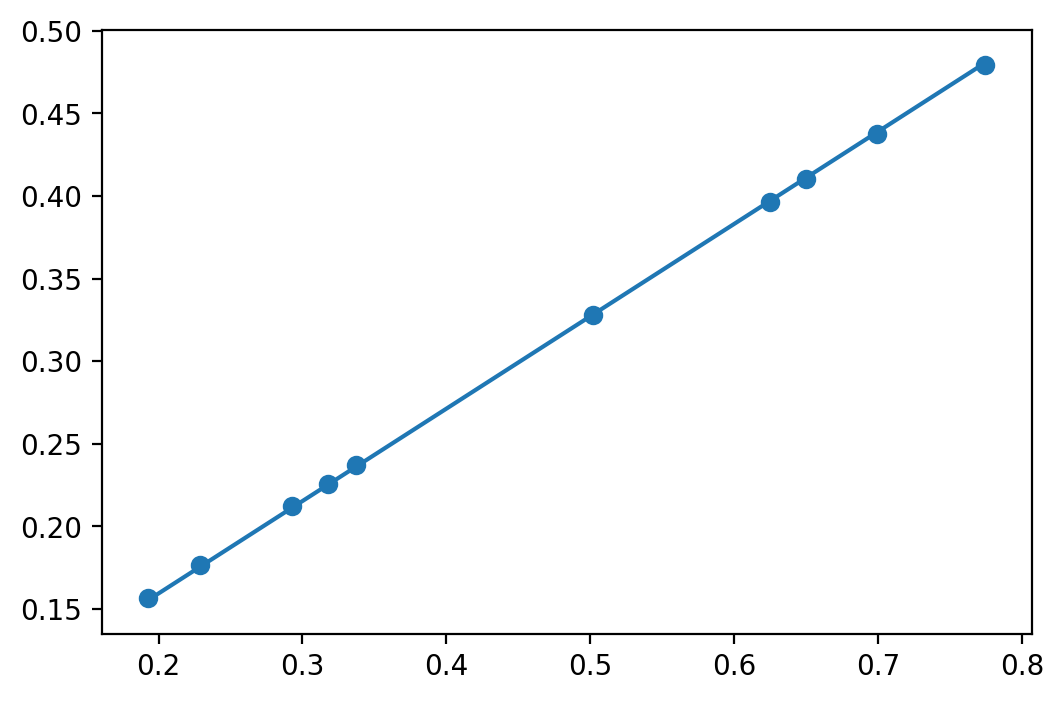

In [64]:
# Plot the learned theta
plotter(X, y, theta)

In [65]:
def plotter_multiple(X, y, theta, theta_true):
    '''
    For comparing the learned theta with the true theta
    Arguments:
        n = 1
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        theta: np array with shape (1+n, 1)
        theta_true: np array with shape (1+n, 1)
    Returns:
        None
        Plots X, y, fit(theta), signal(theta_true)
    '''
    plt.figure(dpi=200)
    plt.scatter(X[:, 1], y)
    line_x = np.array([X[:, 1].min(), X[:, 1].max()])
    plt.plot(line_x, theta[0] + theta[1]*line_x, '--', label='fit')
    plt.plot(line_x, theta_true[0] + theta_true[1]*line_x, ':', label='signal')
    plt.legend()

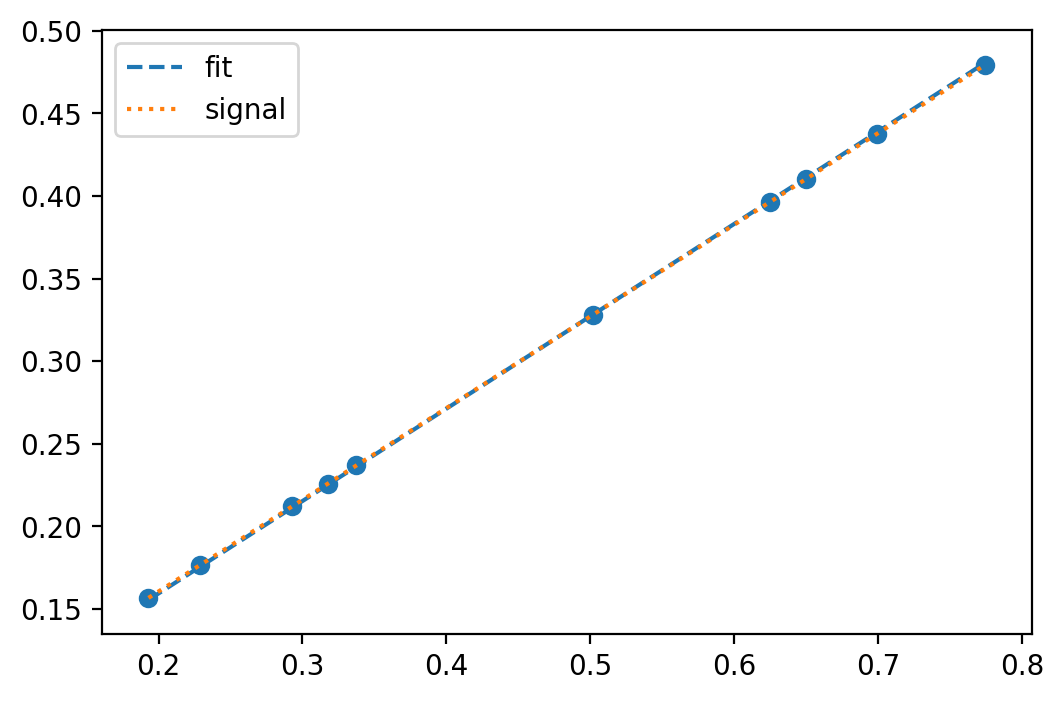

In [66]:
# Fit (learned theta) vs. Signal (true theta)
plotter_multiple(X, y, theta, theta_true)

In [67]:
# Sub-challenge 3 cont.
# Save loss at each epoch for plotting
def GD_memory(X, y, lr, epoch):
    '''
    Finds theta from X and y using gradient descent.
    Starts by random init. of theta
    Repeats GD_one_step for predefined number of epochs
    At each epoch calculates the loss and saves it into a list
    Arguments:
        X: np array with shape (m, 1+n)
        y: np array with shape (m, 1)
        lr: learning rate, a float
        epoch: an integer
    Returns:
        theta: np array with shape (1+n, 1), final theta after training
        memory: a list of floats, each item is loss at each epoch
    '''
    memory = []
    
    return theta, memory

In [68]:
theta, memory = GD_memory(X, y, lr=0.01, epoch=1000)

In [69]:
def loss_plotter(memory):
    '''
    Plots the list of losses
    '''
    plt.figure(dpi=200)
    plt.plot(memory)
    plt.ylabel('loss')
    plt.xlabel('number of epochs')

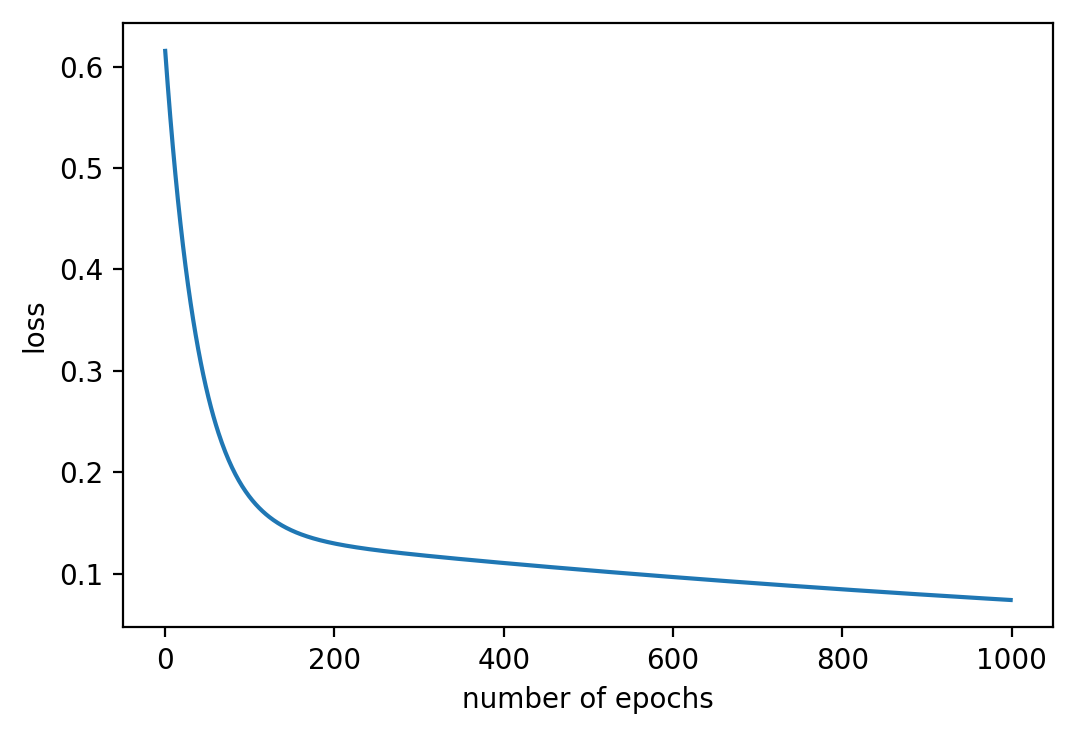

In [70]:
loss_plotter(memory)

## It should work with noisy data as well

In [71]:
# let's introduce noise
y_real = y * np.random.uniform(0.97, 1.03, m).reshape(-1, 1)

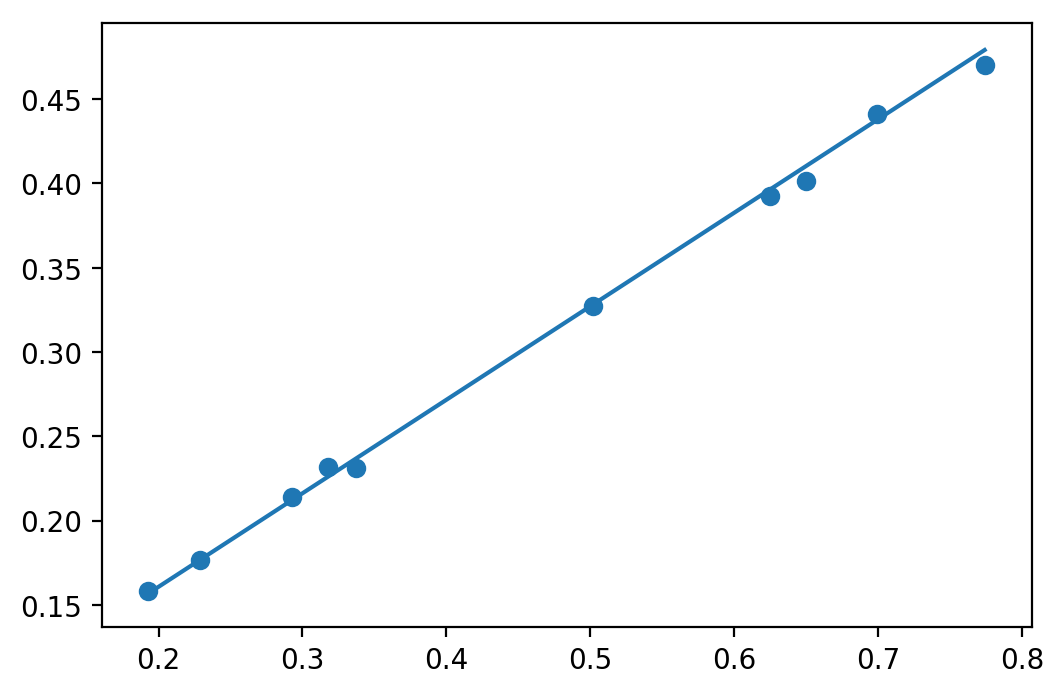

In [72]:
# Plot noisy X and y, with signal
plotter(X, y_real, theta_true)

In [73]:
theta, memory = GD_memory(X, y_real, lr=0.01, epoch=10000)

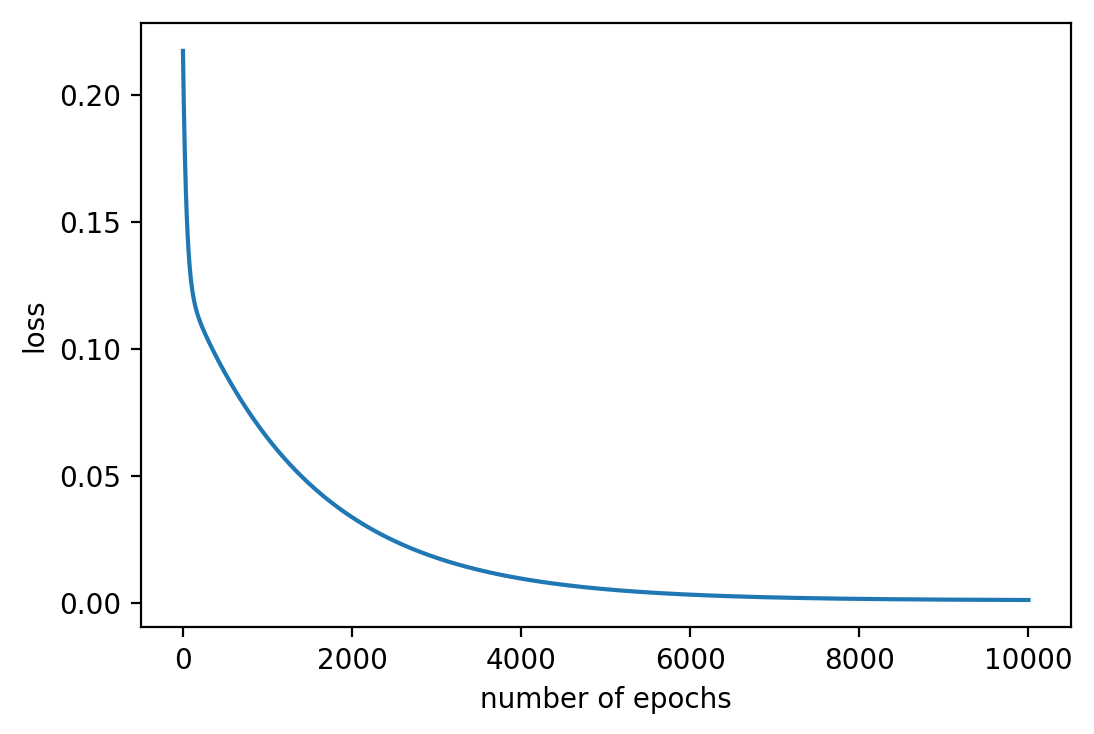

In [74]:
loss_plotter(memory)

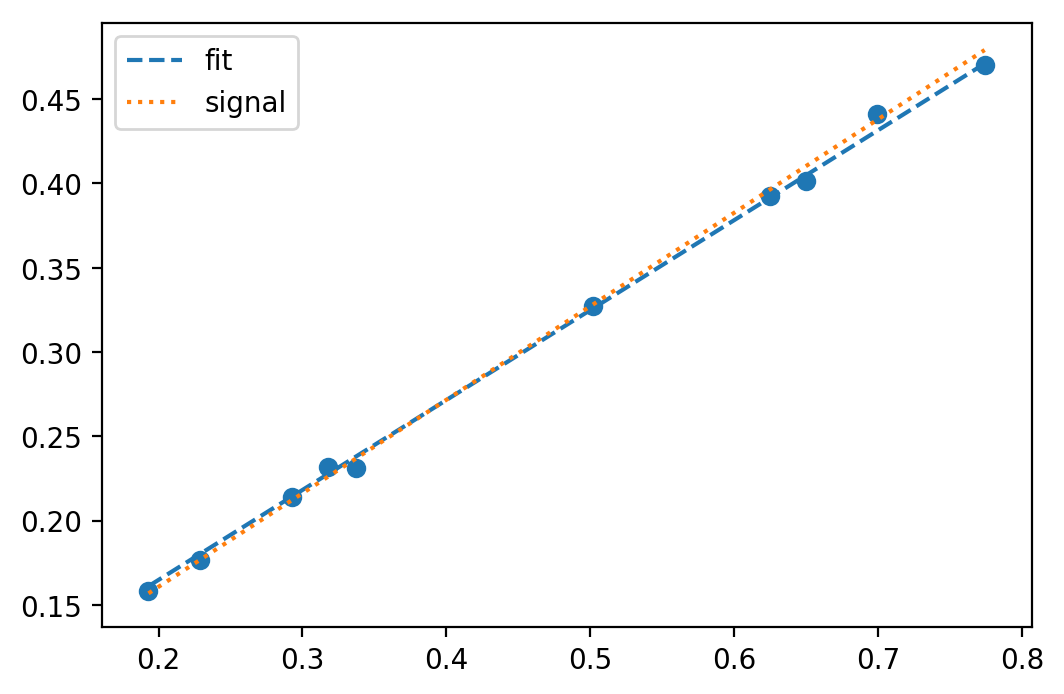

In [75]:
# Fit vs. Signal for noisy data
plotter_multiple(X, y_real, theta, theta_true)

## How about more features and noise

In [76]:
# Repeat data generation with more features + noise
m = 10  # number of examples
n = 2  # number of features

In [77]:
X = np.random.uniform(size=(m, n))
X

array([[0.20011324, 0.06261688],
       [0.953954  , 0.24166609],
       [0.07787241, 0.92590823],
       [0.96146176, 0.19724506],
       [0.17035948, 0.99479614],
       [0.00209128, 0.02980649],
       [0.05672694, 0.07903966],
       [0.87311992, 0.01305432],
       [0.12750353, 0.7170062 ],
       [0.41163831, 0.59416031]])

In [78]:
X = np.concatenate((np.ones((m, 1)), X), axis=1)
X

array([[1.        , 0.20011324, 0.06261688],
       [1.        , 0.953954  , 0.24166609],
       [1.        , 0.07787241, 0.92590823],
       [1.        , 0.96146176, 0.19724506],
       [1.        , 0.17035948, 0.99479614],
       [1.        , 0.00209128, 0.02980649],
       [1.        , 0.05672694, 0.07903966],
       [1.        , 0.87311992, 0.01305432],
       [1.        , 0.12750353, 0.7170062 ],
       [1.        , 0.41163831, 0.59416031]])

In [79]:
theta_true = np.random.uniform(size=(n+1, 1))
theta_true

array([[0.10835929],
       [0.88547444],
       [0.82740538]])

In [80]:
y = np.dot(X, theta_true)

In [81]:
# Add noise
y = y * np.random.uniform(0.97, 1.03, m).reshape(-1, 1)

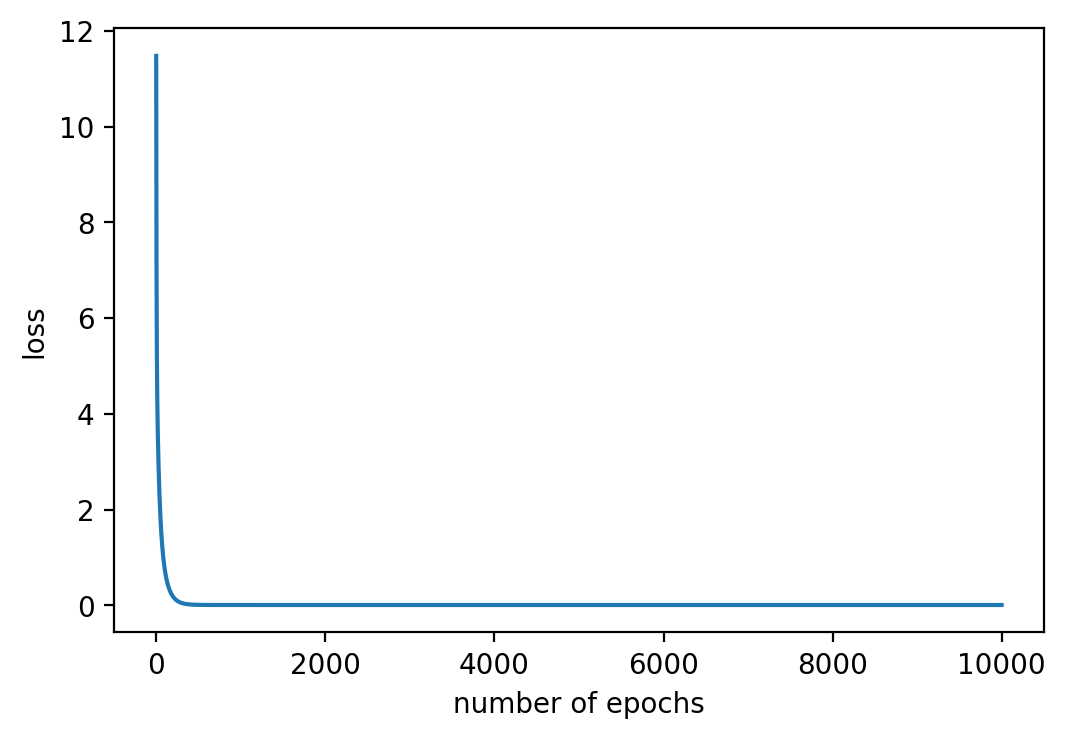

In [82]:
theta, memory = GD_memory(X, y, lr=0.1, epoch=10000)
loss_plotter(memory)

In [83]:
# Learned params vs. True params
print('theta: ', theta.T)
print('theta_true: ', theta_true.T)

theta:  [[0.11139771 0.86932284 0.82249641]]
theta_true:  [[0.10835929 0.88547444 0.82740538]]


In [84]:
# Prediction vs. Label
print('Prediction:', np.dot(X, theta)[0])
print('Ground truth:', y[0])

Prediction: [0.33686288]
Ground truth: [0.33565044]
